<h1 dir=rtl align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
دروازه‌بان
</font>
</h1>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
در این تمرین می‌خواهیم با استفاده از فریم‌ورک کراس، یک شبکه‌ی عصبی عمیق آموزش دهیم که به دروازه‌بان تیم ملی فرانسه برای پرتاب موفق توپ به وسط زمین کمک کند. البته شبکه‌ی عصبی ما بزرگ است و داده‌های‌مان کم! در نتیجه شبکه در حالت عادی بیش‌برازش می‌شود. اما ما کوتاه نیامده و سعی می‌کنیم با استفاده از تکنیک‌های رگولاریزیشنی که آموختیم از بیش‌برازش مدل جلوگیری کرده و تا حد ممکن کمک بهتری به دروازه‌بان برسانیم.
</font>
</p>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
شرح مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
مدل‌های یادگیری عمیق معمولاْ دارای تعداد زیادی پارامتر هستند و در نتیجه پتانسیل و توانایی بالایی جهت یادگیری دارند. چنین پتانسیلی جهت وقوع نیاز به تعداد زیادی داده‌ی آموزشی دارد و اگر حجم داده‌های در دسترس مدل کم باشد به‌احتمال زیاد مدل بر روی همان‌ها بیش‌برازش می‌شود. یعنی مدل بر روی داده‌های آموزشی بسیار خوب عمل می‌کند، اما قادر نیست چیزهایی که یاد گرفته است را به نمونه‌های جدید و تاکنون دیده‌نشده تعمیم دهد. در این تمرین به‌شکل عملی چنین موضوعی را مشاهده خواهیم کرد و چند تکنیک رگولاریزیشن را برای جلوگیری از بیش‌برازش مدل به کار خواهیم برد.
<br>
مسئله‌ی ما این است که دروازه‌بان تیم ملی فرانسه می‌خواهد توپ را به وسط زمین پرتاب کند تا یکی از بازیکنان خودی بتواند با سر به آن ضربه بزند. به‌عنوان مثال در شکل زیر یک زمین فوتبال را مشاهده می‌کنید که نحوه‌ی پرتاب توپ توسط دروازه‌بان و موقعیت بازیکنان را نشان می‌دهد. اطلاعات تمامی پرتاب‌ها در ۱۰ بازی گذشته‌ی تیم ملی فرانسه در اختیار شما قرار گرفته و قصد داریم مدلی آموزش دهیم که بتواند پیش‌بینی کند آیا توپ به بازیکن خودی می‌رسد یا خیر. در نهایت با استفاده از مدل می‌توانیم در تمرین‌های آینده پرتاب‌های دروازه‌بان را بهبود بخشیم.
</p>
</font>

<center>
<img src="https://quera.org/qbox/view/chXV9Oyhrm/field_kiank.png">
</center>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
پیش از هر چیز با استفاده از تابع <code>np.load</code> ویژگی‌ها و برچسب‌های داده‌های آموزشی و اعتبارسنجی را بخوانید.
</p>
</font>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data_train_x = np.load('data/data_X.npy') # TODO: load data_X.npy
data_train_y = np.load('data/data_y.npy') # TODO: load data_y.npy
data_eval_x = np.load('data/data_Xval.npy') # TODO: load data_Xval.npy
data_eval_y = np.load('data/data_yval.npy') # TODO: load data_yval.npy

print(data_train_x.shape, data_train_y.shape, data_eval_x.shape, data_eval_y.shape)

(211, 2) (211, 1) (200, 2) (200, 1)


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
از آن‌جا که مجموعه‌داده شامل دو ویژگی و تعداد کمی نمونه است می‌توانیم آن را در یک صفحه‌ی دوبعدی نمایش دهیم. در شکل زیر هر نقطه به موقعیتی در زمین فوتبال اشاره می‌کند که یک بازیکن فوتبال بعد از آن‌که دروازه‌بان تیم فرانسه از سمت چپ زمین به توپ ضربه زده، با سر خود به آن ضربه زده است. اگر رنگ نقطه آبی باشد یعنی توپ به بازیکن خودی رسیده و بازیکن تیم فرانسه توانسته با سر به توپ ضربه بزند و اگر رنگ آن قرمز باشد یعنی توپ به بازیکن تیم مقابل رسیده است. هدف ما این است که مدلی بسازیم که پیش‌بینی کند بازیکن کدام تیم به توپ ضربه می‌زند.
</p>
</font>

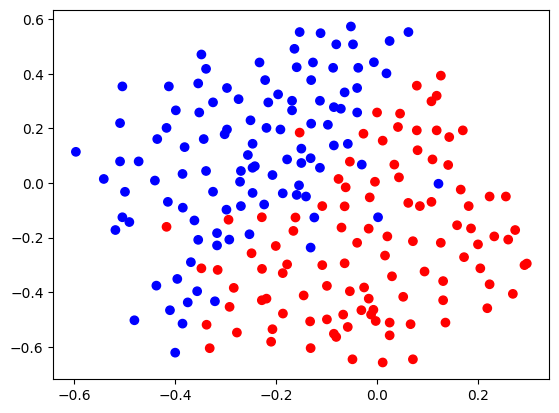

In [5]:
colors = ['red' if label == 0 else 'blue' for label in data_train_y.ravel()]
plt.scatter(data_train_x[:, 0], data_train_x[:, 1], c=colors)

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تحلیل داده‌ها
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
طبق نمودار بالا می‌توان مشاهده کرد که با وجود این‌که نمونه‌ها دارای کمی نویز هستند اما به نظر می‌رسد یک خط قطری که ناحیه‌ی بالا سمت چپ (آبی) را از ناحیه‌ی پایین سمت راست (قرمز) جدا می‌کند می‌تواند پاسخ بسیار خوبی باشد.
<br>
ابتدا یک مدل بدون هیچ‌گونه رگولاریزیشنی بسازیم و بررسی کنیم که اگر مجموعه‌داده ساده و کوچک باشد اما مدل از ظرفیت یادگیری بالایی برخوردار باشد چه اتفاقی می‌افتد. سپس به‌سراغ استفاده از تکنیک‌های رگولاریزیشن برویم و تاثیر آن‌ها را بررسی کنیم.
</font>
</p>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل بدون رگولاریزیشن
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
در زیر ما یک شبکه‌ی عصبی شامل ۴ لایه می‌سازیم که هر لایه (به‌غیر از لایه‌ی آخر) متشکل از ۵۰۰۰ نورون است و از تابع فعال‌ساز <code>relu</code> استفاده می‌کند.
لایه‌ی خروجی نیز تنها یک نورون دارد (مسئله دو کلاسه است) و از تابع فعال‌ساز <code>sigmoid</code> استفاده می‌کند. مشخص است که چنین مدلی به‌دلیل تعداد لایه‌ها و نورون‌های زیاد در مقایسه با داده‌هایی که در اختیار داریم بسیار بزرگ است و احتمال بیش‌برازش وجود دارد.
</font>
</p>

In [6]:
# !pip install keras --upgrade
# uncomment the above line if you don't have keras 3 installed

In [7]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [8]:
import keras

model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
حال الگوریتم بهینه‌ساز، تابع زیان و معیار عملکرد را مشخص کرده و مدل را کامپایل می‌کنیم.
</font>
</p>

In [9]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
این مدل را آموزش می‌دهیم تا نتیجه‌ی آن را بررسی کنیم.
</font>
</p>

In [10]:
history = model.fit(data_train_x, data_train_y,
                    epochs=500, batch_size=32,
                    validation_data=(data_eval_x, data_eval_y))

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 378ms/step - accuracy: 0.7397 - loss: 0.5272 - val_accuracy: 0.9300 - val_loss: 0.3797
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8964 - loss: 0.3038 - val_accuracy: 0.9150 - val_loss: 0.2771
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8772 - loss: 0.2489 - val_accuracy: 0.9100 - val_loss: 0.2773
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9159 - loss: 0.2614 - val_accuracy: 0.9200 - val_loss: 0.3318
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9274 - loss: 0.2364 - val_accuracy: 0.9150 - val_loss: 0.3997
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9046 - loss: 0.2479 - val_accuracy: 0.9350 - val_loss: 0.2637
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9270 - loss: 0.1978 - val_accuracy: 0.9250 - val_loss: 0.2941
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9421 - loss: 0.1999 - val_accuracy: 0.9200 - val_loss

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
جهت تحلیل و بررسی عملکرد مدل به رسم نمودار زیان و دقت آن روی داده‌های آموزشی و اعتبارسنجی می‌پردازیم.
</font>
</p>

In [11]:
def plot_loss_acc(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(train_loss) + 1)

    fig, axs = plt.subplots(2, figsize=(10, 7))
    fig.suptitle('Training and Validation Metrics')

    # Loss plot
    axs[0].plot(epochs, train_loss, label='Training loss', c='red')
    axs[0].plot(epochs, val_loss, label='Validation loss', c='blue')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].set_ylim([0, 1.5])

    # Accuracy plot
    axs[1].plot(epochs, train_acc, label='Training accuracy', c='red')
    axs[1].plot(epochs, val_acc, label='Validation accuracy', c='blue')
    axs[1].set_title('Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()

    plt.subplots_adjust(hspace=0.5)
    plt.show()

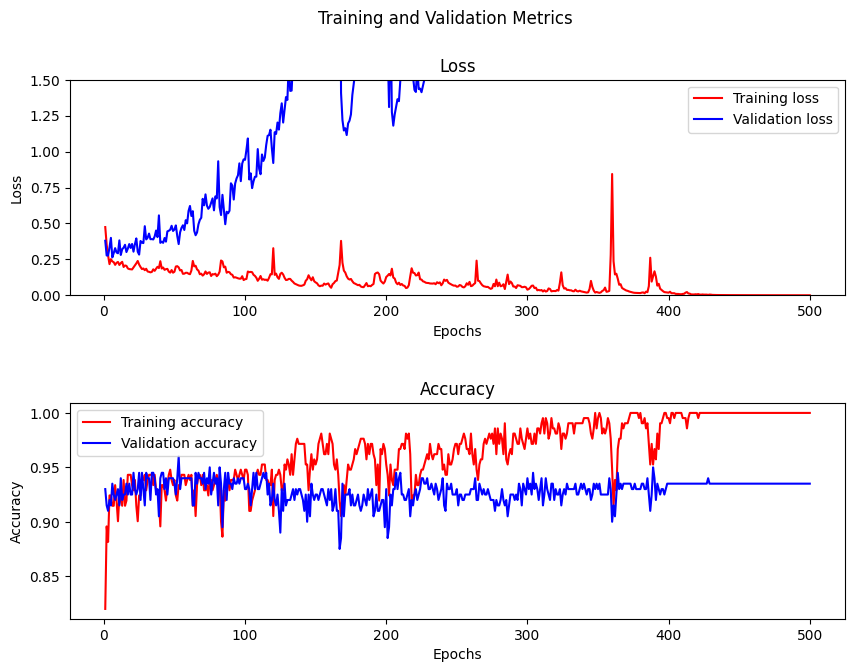

In [12]:
plot_loss_acc(history)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
همان‌طور که در نمودار بالا مشاهده می‌کنید، دقت مدل روی داده‌های آموزشی به ۱۰۰٪ می‌رسد، در حالی‌که دقت آن روی داده‌های اعتبارسنجی با تفاوت زیادی کمتر است و فقط حدود ۹۲.۵٪ است. به بیان دیگر، زیان مدل روی داده‌های آموزشی به صورت مداوم کاهش پیدا می‌کند و نزدیک به صفر می‌شود، در حالی‌که زیان برای داده‌های اعتبارسنجی بسیار زیاد می‌شود. چنین موضوعی به‌وضوح بیانگر بیش‌برازش مدل است. برای درک بهتر بیش‌برازش مدل بیایید خط تصمیم مدل را رسم کنیم و ببینیم مدل به چه نحوی نمونه‌ها را دسته‌بندی می‌کند.
</font>
</p>

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

def get_decision_boundaries(model, xmin, xmax, ymin, ymax, steps):
  x_span = np.linspace(xmin, xmax, steps)
  y_span = np.linspace(ymin, ymax, steps)
  xx, yy = np.meshgrid(x_span, y_span)
  points = (np.stack([xx.ravel(), yy.ravel()], axis=1).astype(np.float32))

  z = (model.predict(np.c_[xx.ravel(), yy.ravel()])>0.5).reshape(xx.shape)

  return xx, yy, z

def plt_decision_boundaries(model, x_min, x_max, y_min, y_max, steps):
  plt.figure(figsize=(6, 4))
  xx, yy, z = get_decision_boundaries(model, x_min, x_max, y_min, y_max, steps)
  plt.contourf(xx, yy, z, alpha=0.2, cmap=matplotlib.colors.ListedColormap(["C1", "C0"]));


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


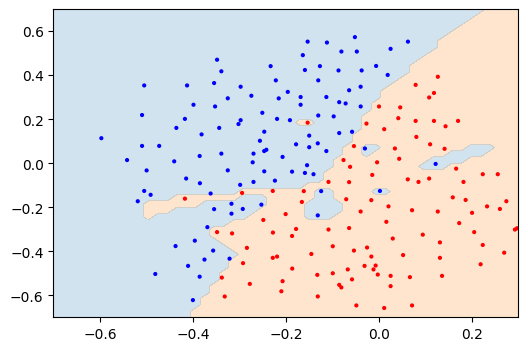

In [14]:
plt_decision_boundaries(model, -0.7, 0.3, -0.7, 0.7, 50)
colors = ['red' if label == 0 else 'blue' for label in data_train_y.ravel()]
plt.scatter(data_train_x[:, 0], data_train_x[:, 1], c=colors, s=4)
plt.show()


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
همان‌طور که مشاهده می‌کند مدل تمام سعی خود را کرده تا نمونه‌های آموزشی را به‌شکل کاملاْ دقیقی دسته‌بندی کند. در واقع می‌توان به‌وضوح دید که مدل موقعیت تمام نمونه‌های آموزشی را در ذهن خود حفظ کرده است و چنین موضوع به معنی عمومیت کم مدل است.
</font>
</p>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تکنیک حذف تصادفی
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
یکی از روش‌هایی که جهت رگولاریز کردن وزن‌های مدل آموختیم، حذف تصادفی (Dropout) بود. در اینجا می‌خواهیم تاثیر استفاده از این تکنیک را آزمایش کنیم، پس بین هر دو لایه از شبکه، یک لایه‌ی <code>Dropout</code> با نرخ ۰.۶ قرار دهید.
</font>
</p>


In [15]:
model_dropout = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(1, activation='sigmoid')])

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
اکنون تمامی مراحل قبل را تکرار می‌کنیم تا نتیجه‌ی مدل جدید و تاثیر تکنیک حذف تصادفی را بررسی کنیم.
</font>
</p>

In [16]:
model_dropout.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model_dropout.fit(data_train_x, data_train_y,
                            epochs=500, batch_size=32,
                            validation_data=(data_eval_x, data_eval_y))

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 424ms/step - accuracy: 0.7316 - loss: 0.5739 - val_accuracy: 0.8750 - val_loss: 0.4222
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8772 - loss: 0.4219 - val_accuracy: 0.8800 - val_loss: 0.4186
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8854 - loss: 0.3081 - val_accuracy: 0.9150 - val_loss: 0.3572
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9311 - loss: 0.2217 - val_accuracy: 0.9350 - val_loss: 0.2935
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9166 - loss: 0.2413 - val_accuracy: 0.8950 - val_loss: 0.3667
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9100 - loss: 0.2567 - val_accuracy: 0.9150 - val_loss: 0.2907
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9087 - loss: 0.2056 - val_accuracy: 0.9300 - val_loss: 0.2866
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9213 - loss: 0.2530 - val_accuracy: 0.9000 - val_loss

In [18]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

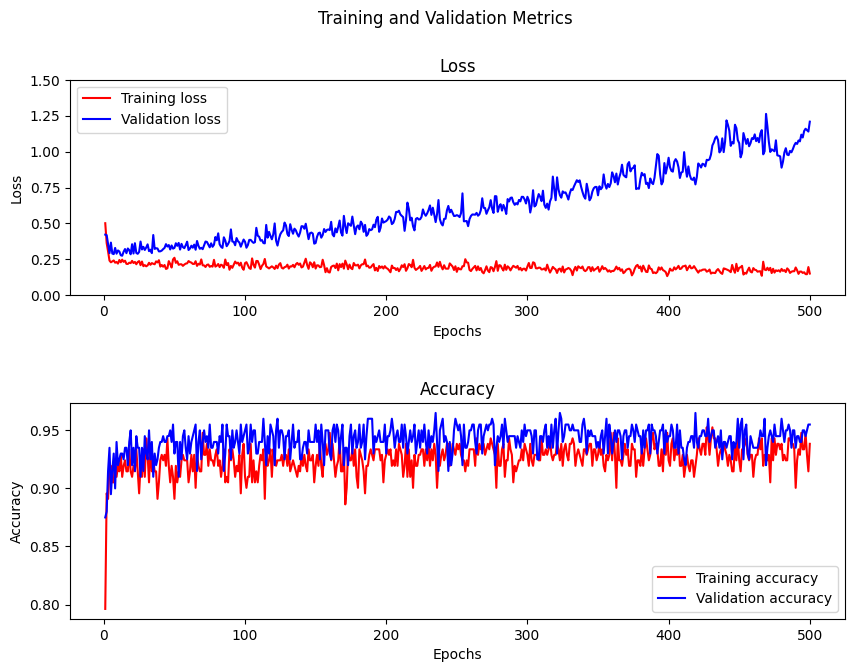

In [19]:
plot_loss_acc(history)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


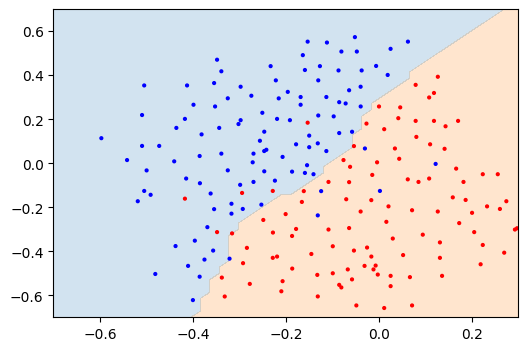

In [20]:
plt_decision_boundaries(model_dropout, -0.7, 0.3, -0.7, 0.7, 50)
colors = ['red' if label == 0 else 'blue' for label in data_train_y.ravel()]
plt.scatter(data_train_x[:, 0], data_train_x[:, 1], c=colors, s=4)
plt.show()

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
طبق نتایج به‌دست‌آمده می‌توان به‌وضوح مشاهده کرد که با استفاده از تکنیک حذف تصادفی توانستیم به‌سادگی با چالش بیش‌برازش مقابله کنیم و مدل توانست یک دسته‌بندی منطقی و عمومی‌تر ارائه دهد. عملکرد مدل از نظر دقت نیز افزایش پیدا کرده است.
</font>
</p>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تکنیک رگولاریزیشن <i>L1</i> و <i>L2</i>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
این‌بار می‌خواهیم به‌جای استفاده از حذف تصادفی، از رگولایزر <code>L1L2</code> برای وزن‌های کرنل هر لایه استفاده کنیم. برای مطالعه‌ی مستندات این نوع رگولاریزیشن می‌توانید به <a href="https://keras.io/api/layers/regularizers/#l1l2-class" target="_blank">این لینک</a> مراجعه کنید. ضریب <code>l1</code> را معادل با <code>3e-5</code> و ضریب <code>l2</code> را معادل با <code>3e-4</code> قرار دهید.
</font>
</p>

In [21]:
model_l1l2 = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(5000, activation='relu', kernel_regularizer=None), # TODO: add L1L2 regularizer
    keras.layers.Dense(5000, activation='relu', kernel_regularizer=None), # TODO: add L1L2 regularizer
    keras.layers.Dense(5000, activation='relu', kernel_regularizer=None), # TODO: add L1L2 regularizer
    keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=None) # TODO: add L1L2 regularizer
    ])

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
مجدد تمامی مراحل آموزش و ارزیابی مدل را تکرار می‌کنیم تا تاثیر این تکنیک را بررسی کنیم.
</font>
</p>

In [22]:
model_l1l2.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
history = model_l1l2.fit(data_train_x, data_train_y,
                         epochs=500, batch_size=32,
                         validation_data=(data_eval_x, data_eval_y))

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.7211 - loss: 0.5448 - val_accuracy: 0.9050 - val_loss: 0.3297
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8963 - loss: 0.2834 - val_accuracy: 0.8950 - val_loss: 0.3754
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9048 - loss: 0.2538 - val_accuracy: 0.9350 - val_loss: 0.2939
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9108 - loss: 0.2113 - val_accuracy: 0.9050 - val_loss: 0.3031
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9145 - loss: 0.2320 - val_accuracy: 0.9300 - val_loss: 0.2770
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9256 - loss: 0.2413 - val_accuracy: 0.9300 - val_loss: 0.3159
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9332 - loss: 0.1998 - val_accuracy: 0.9300 - val_loss: 0.2814
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9372 - loss: 0.1928 - val_accuracy: 0.9200 - val_loss

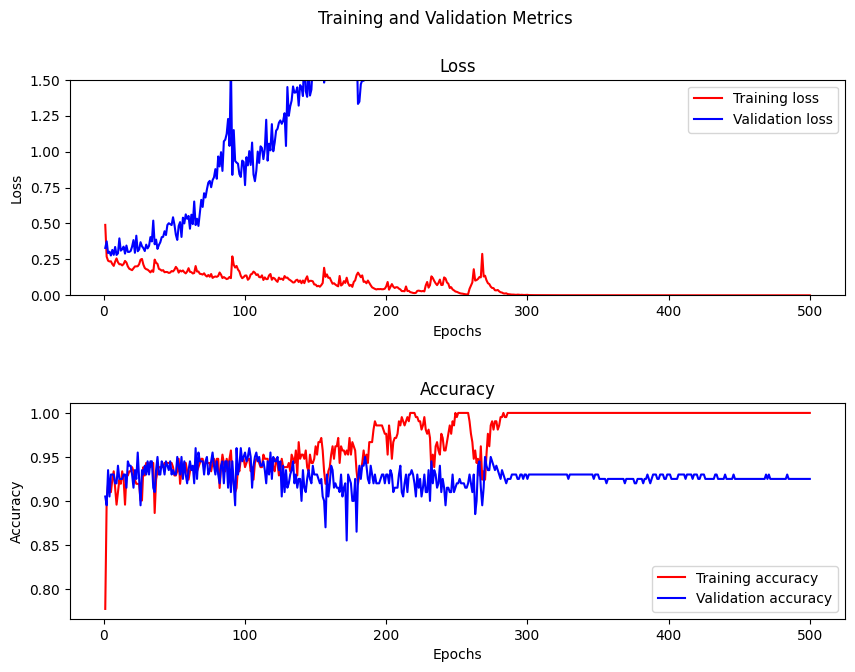

In [24]:
plot_loss_acc(history)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


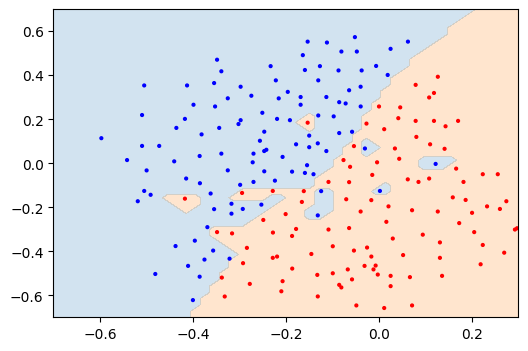

In [25]:
plt_decision_boundaries(model_l1l2, -0.7, 0.3, -0.7, 0.7, 50)
colors = ['red' if label == 0 else 'blue' for label in data_train_y.ravel()]
plt.scatter(data_train_x[:, 0], data_train_x[:, 1], c=colors, s=4)
plt.show()

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
مشاهده می‌کنید که با استفاده از تکنیک رگولاریزیشن <code>L1L2</code> نیز توانستیم از بیش‌برازش مدل جلوگیری کرده و به مدلی با عمومیت بهتر دست یابیم. در اینجا نیز دقت مدل نسبت به حالت اولیه افزایش پیدا کرده است.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول‌های زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد. همچنین اگر از گوگل کولب استفاده می‌کنید، در صورت نیاز به پشتیبانی حتماً آخرین نسخه از نت‌بوک را به‌صورت دستی دانلود کرده و داخل فایل ارسالی قرار دهید یا لینک کولب را با ما به‌اشتراک بگذارید.
</font>
</p>

In [26]:
import numpy as np
import json

def get_kernel_regularizer_info(layer):
  try:
      con = layer.get_config()['kernel_regularizer']
      con['config']['l1']=round(con['config']['l1'], 6)
      con['config']['l2']=round(con['config']['l2'], 6)
      return str(con)
  except:
      return ""

model_l1l2_info=[]
for layer in model_l1l2.layers:
  if layer.__class__.__name__=="Dense":
    model_l1l2_info.append({
        "name": layer.__class__.__name__,
        "units":layer.units,
        "activation":layer.get_config()["activation"],
        "kernel_regularizer": get_kernel_regularizer_info(layer)
    })
  elif layer.__class__.__name__=="Dropout":
    model_l1l2_info.append({
        "name": layer.__class__.__name__,
        "trainable":layer.get_config()["trainable"],
        "rate": layer.get_config()["rate"],
    })
  else:
    model_l1l2_info.append({"name": layer.__class__.__name__})

with open("model_l1l2_info.json", "w") as f:
    json.dump(model_l1l2_info, f)

model_dropout_info=[]
for layer in model_dropout.layers:
  if layer.__class__.__name__=="Dense":
    model_dropout_info.append({
        "name": layer.__class__.__name__,
        "units":layer.units,
        "activation":layer.get_config()["activation"],
        "kernel_regularizer": get_kernel_regularizer_info(layer)
    })
  elif layer.__class__.__name__=="Dropout":
    model_dropout_info.append({
        "name": layer.__class__.__name__,
        "trainable":layer.get_config()["trainable"],
        "rate": layer.get_config()["rate"],
    })
  else:
    model_dropout_info.append({"name": layer.__class__.__name__})

with open("model_dropout_info.json", "w") as f:
    json.dump(model_dropout_info, f)

In [27]:
import zipfile
import joblib

if not os.path.exists(os.path.join(os.getcwd(), 'goalkeeper.ipynb')):
    %notebook -e goalkeeper.ipynb

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ['model_l1l2_info.json', 'model_dropout_info.json', 'goalkeeper.ipynb']
compress(file_names)

File Paths:
['model_l1l2_info.json', 'model_dropout_info.json', 'goalkeeper.ipynb']
